In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
from sklearn.metrics import mean_squared_error 

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
df = pd.read_csv('../data/Finaldf_Cleaned_2.csv').drop('Unnamed: 0', axis = 1)

In [19]:
df.tail()

,State,County,FIPS,2010:UnemploymentRate,DDP:2012:percent.8,Diabetes_pct_growth_rate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,...,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+,DDP:2010:percent.6
3129,Wyoming,Sweetwater,56037.0,6.6,8.0,0.140845,0.611787,30.570505,9.862513,0.521595,...,0.071147,0.075092,0.072133,0.058467,0.040105,0.023340,0.017000,0.009580,0.008500,7.1
3130,Wyoming,Teton,56039.0,7.7,4.8,0.230769,1.177468,29.174527,7.708971,0.525547,...,0.067857,0.083436,0.072213,0.049200,0.033100,0.020030,0.015674,0.010844,0.009092,3.9
3131,Wyoming,Uinta,56041.0,7.0,8.7,0.216216,0.712454,20.220414,12.393224,0.504877,...,0.069846,0.077112,0.074065,0.065159,0.054494,0.041134,0.033165,0.026017,0.021915,7.4
3132,Wyoming,Washakie,56043.0,5.9,11.1,0.411765,0.949780,10.915407,11.478387,0.498652,...,0.077414,0.085322,0.083518,0.063402,0.044950,0.040233,0.026360,0.022475,0.025388,8.5
3133,Wyoming,Weston,56045.0,4.8,9.8,0.204819,0.550509,17.209949,13.831502,0.525805,...,0.084727,0.087786,0.093902,0.065300,0.047311,0.024645,0.016550,0.007555,0.004497,8.3


In [22]:
df = df[['State', 'County', 'FIPS', '2010:UnemploymentRate',
       'DDP:2012:percent.8', 'DDP:2010:percent.6', 'Diabetes_pct_growth_rate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'pct_male',
       '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14',
       '2010:AgeGroup04:15-19', '2010:AgeGroup05:20-24',
       '2010:AgeGroup06:25-29', '2010:AgeGroup07:30-34',
       '2010:AgeGroup08:35-39', '2010:AgeGroup09:40-44',
       '2010:AgeGroup10:45-49', '2010:AgeGroup11:50-54',
       '2010:AgeGroup12:55-59', '2010:AgeGroup13:60-64',
       '2010:AgeGroup14:65-69', '2010:AgeGroup15:70-74',
       '2010:AgeGroup16:75-79', '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+']]

In [85]:
#make subset of columns for plotting, and move diabetes feature (target) to the end

feats_and_target_numeric = list(df.columns[3:])
feats_and_target_numeric.append(feats_and_target_numeric.pop(1))
feats_and_target_numeric.append(feats_and_target_numeric.pop(1))
feats_and_target_numeric.append(feats_and_target_numeric.pop(1))


feats_and_target_numeric_no_ages = list(df.columns[3:11])
feats_and_target_numeric_no_ages.append(feats_and_target_numeric_no_ages.pop(1))
feats_and_target_numeric_no_ages.append(feats_and_target_numeric_no_ages.pop(1))
feats_and_target_numeric_no_ages.append(feats_and_target_numeric_no_ages.pop(1))


feats_numeric = feats_and_target_numeric[:-3] + ['DDP:2010:percent.6']
feats_numeric

diabeteschg = "Diabetes_pct_growth_rate"
pov2010 = 'Poverty Rate 2010'
unemp2019 = '2010:UnemploymentRate'

In [24]:
feats_and_target_numeric_no_ages

['2010:UnemploymentRate',
 'FFRPTH09',
 'PCT_LACCESS_POP10',
 'Poverty Rate 2010',
 'pct_male',
 'DDP:2012:percent.8',
 'DDP:2010:percent.6',
 'Diabetes_pct_growth_rate']

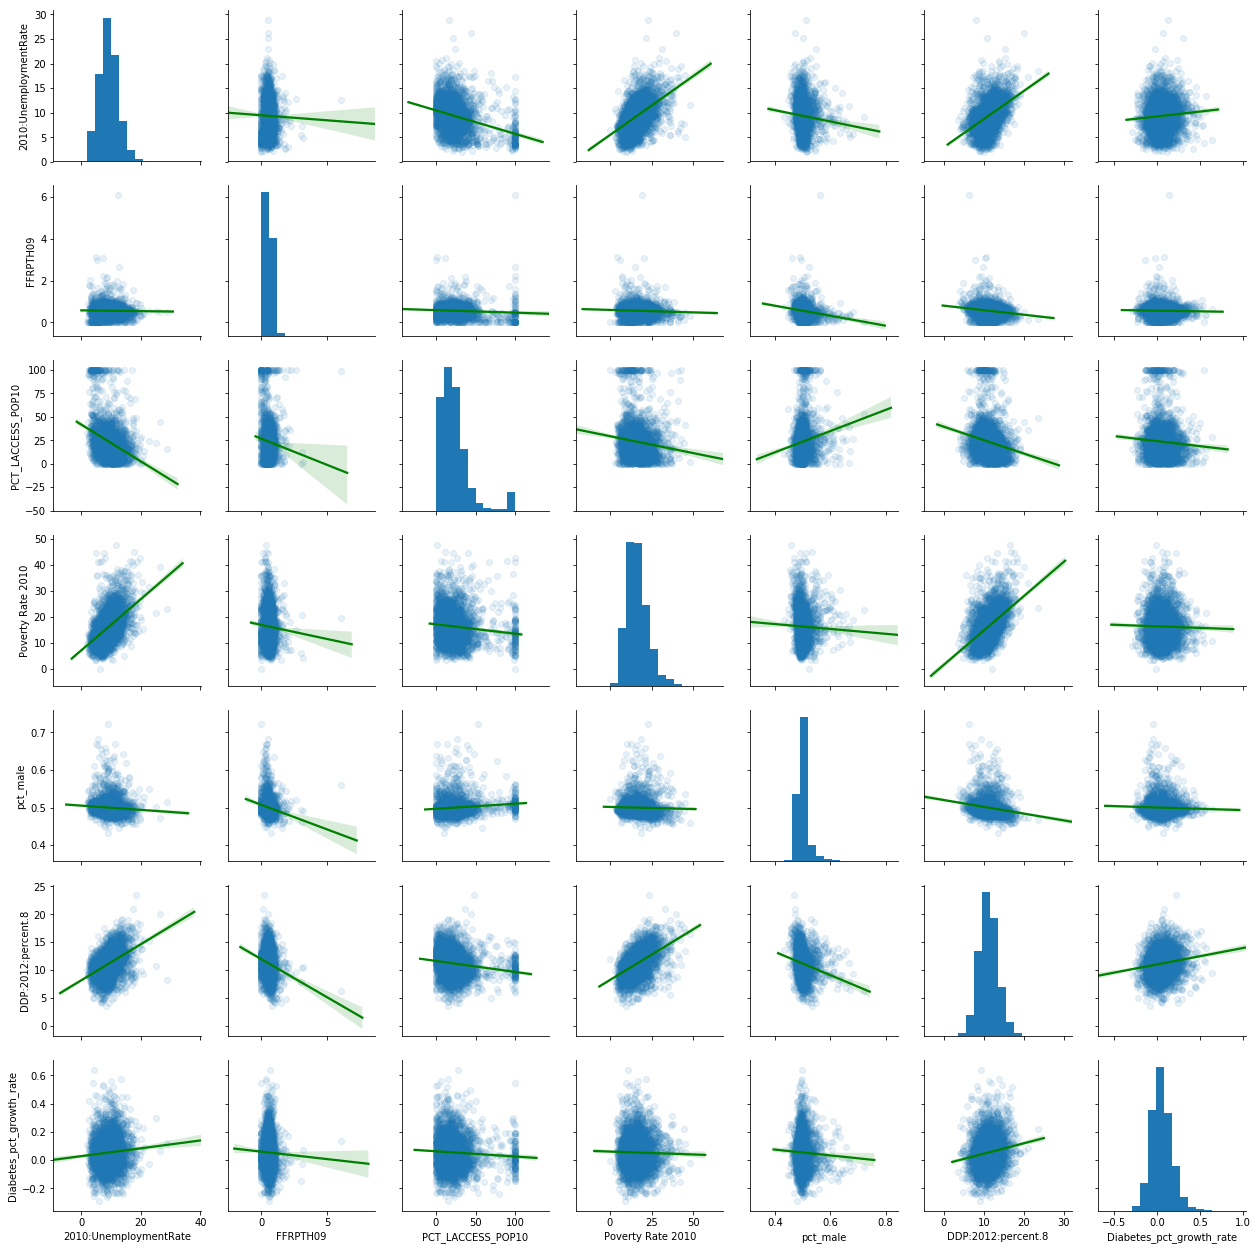

In [17]:
sns.pairplot(df[feats_and_target_numeric_no_ages], kind="reg", plot_kws={'line_kws':{'color':'green'}, 'scatter_kws': {'alpha': 0.1}})

### Thoughts:

Diabetes growth rate (2010/2013) seems to be most related to the starting percent...

In [40]:
s = df.sample(30)[feats_and_target_numeric_no_ages]

In [26]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

In [ ]:
sns.pairplot(df[feats_and_target_numeric_no_ages], hue=diabeteschg, palette='coolwarm')

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/LB/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: 

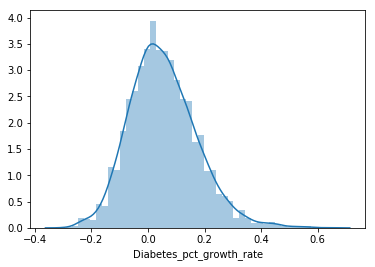

In [27]:
sns.distplot(df[diabeteschg])

Text(0.5,1,'Standard Correlation Matrix')

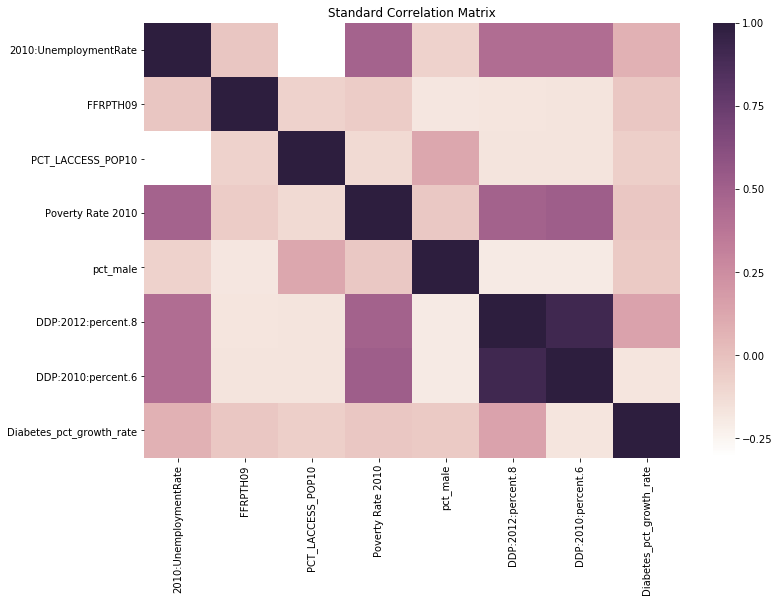

In [28]:
corr = df[feats_and_target_numeric_no_ages].corr()
corr
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap=cmap)
plt.title("Standard Correlation Matrix")

In [29]:
corr

,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,DDP:2012:percent.8,DDP:2010:percent.6,Diabetes_pct_growth_rate
2010:UnemploymentRate,1.000000,-0.019349,-0.307847,0.487942,-0.080348,0.431457,0.426752,0.073752
FFRPTH09,-0.019349,1.000000,-0.082671,-0.050684,-0.176205,-0.171919,-0.161121,-0.026441
PCT_LACCESS_POP10,-0.307847,-0.082671,1.000000,-0.115044,0.123904,-0.169000,-0.160354,-0.063304
Poverty Rate 2010,0.487942,-0.050684,-0.115044,1.000000,-0.032415,0.492409,0.515283,-0.022260
pct_male,-0.080348,-0.176205,0.123904,-0.032415,1.000000,-0.193915,-0.193766,-0.038094
DDP:2012:percent.8,0.431457,-0.171919,-0.169000,0.492409,-0.193915,1.000000,0.916126,0.147492
DDP:2010:percent.6,0.426752,-0.161121,-0.160354,0.515283,-0.193766,0.916126,1.000000,-0.174009
Diabetes_pct_growth_rate,0.073752,-0.026441,-0.063304,-0.022260,-0.038094,0.147492,-0.174009,1.000000


/Users/LB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Correlation matrix - no diagonals')

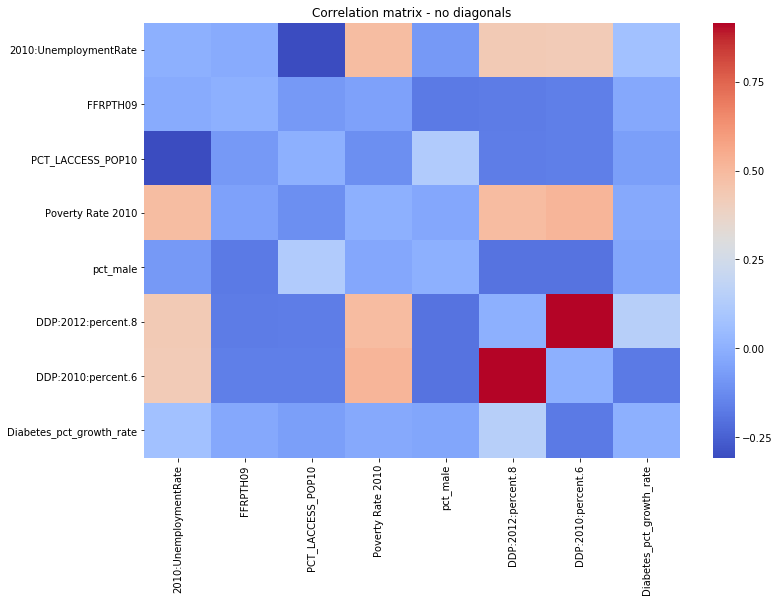

In [30]:
#Plotting when diangonals are zero (to take up less visual weight and balanace out scale)

corr.values[[np.arange(corr.shape[0])]*2] = 0
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation matrix - no diagonals")

### Thoughts so far!

All my predictors for the GRWOTH RATE are pretty close to zero...hrumph! (really, i'm trying to see if i can guess the new diabetes rates from other factors, and those are the factors counties probably should fix)

# Outlier Exploration

In [31]:
df[df['FFRPTH09'] > 6]  #this one outlier is really crazy. for linear regression, removing it. 


,State,County,FIPS,2010:UnemploymentRate,DDP:2012:percent.8,DDP:2010:percent.6,Diabetes_pct_growth_rate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,...,2010:AgeGroup09:40-44,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+
296,Colorado,San Juan,8111.0,12.5,6.2,5.9,0.135593,6.08828,99.24281,19.544846,...,0.08955,0.085474,0.08955,0.083571,0.066042,0.040495,0.013725,0.008697,0.00462,0.002718


In [32]:
df_removed_outliers = df[df['FFRPTH09'] < 6]

In [34]:
corr_removed_outliers = df_removed_outliers[feats_and_target_numeric].corr()

In [37]:
corr_removed_outliers.sort_values('Diabetes_pct_growth_rate')

,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,2010:AgeGroup02:5-9,2010:AgeGroup03:10-14,2010:AgeGroup04:15-19,2010:AgeGroup05:20-24,...,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+,DDP:2012:percent.8,DDP:2010:percent.6,Diabetes_pct_growth_rate
DDP:2010:percent.6,0.427808,-0.157431,-0.158268,0.516028,-0.192260,-0.012597,-0.006324,0.005818,0.054390,0.059157,...,-0.145762,-0.020759,0.021697,0.018764,-0.036640,-0.096288,-0.170096,0.916007,1.000000,-0.173682
PCT_LACCESS_POP10,-0.309777,-0.111121,1.000000,-0.115917,0.121030,0.072434,0.038808,0.029999,-0.010855,-0.038821,...,0.055678,-0.017088,0.009531,0.055686,0.115767,0.134072,0.152997,-0.167001,-0.158268,-0.064271
pct_male,-0.081332,-0.203983,0.121030,-0.032903,1.000000,0.021639,-0.001717,-0.012542,-0.048832,-0.022392,...,0.065362,0.030673,0.003928,-0.006615,-0.012267,-0.023486,-0.007081,-0.192452,-0.192260,-0.038745
FFRPTH09,-0.026674,1.000000,-0.111121,-0.056842,-0.203983,0.023295,0.011492,-0.008855,0.022619,0.052004,...,-0.024770,-0.012570,-0.039407,-0.055367,-0.063261,-0.041818,-0.040319,-0.169219,-0.157431,-0.032259
Poverty Rate 2010,0.487878,-0.056842,-0.115917,1.000000,-0.032903,0.073476,0.053811,0.043473,0.059992,0.058429,...,-0.107173,-0.012557,-0.001122,-0.025686,-0.097751,-0.153107,-0.215241,0.493108,0.516028,-0.022373
2010:AgeGroup01:0-4,-0.038356,0.023295,0.072434,0.073476,0.021639,1.000000,0.873710,0.695589,0.326403,0.117419,...,-0.622410,-0.655937,-0.602800,-0.556504,-0.513580,-0.465942,-0.367878,-0.013393,-0.012597,-0.020668
2010:AgeGroup06:25-29,0.064283,0.049510,-0.019005,0.075291,0.015819,0.439010,0.222944,-0.015137,0.244320,0.584427,...,-0.604209,-0.675214,-0.693400,-0.682487,-0.638026,-0.563261,-0.460871,0.017671,0.023352,-0.016020
2010:AgeGroup02:5-9,-0.011043,0.011492,0.038808,0.053811,-0.001717,0.873710,1.000000,0.867568,0.307873,-0.060337,...,-0.564233,-0.591944,-0.546994,-0.526150,-0.496238,-0.461951,-0.367129,-0.005693,-0.006324,-0.011134
2010:AgeGroup03:10-14,0.011364,-0.008855,0.029999,0.043473,-0.012542,0.695589,0.867568,1.000000,0.286735,-0.224560,...,-0.421213,-0.438942,-0.406979,-0.394823,-0.383261,-0.370073,-0.298016,0.007901,0.005818,-0.004676
2010:AgeGroup11:50-54,-0.111511,-0.045304,0.037144,-0.147063,0.066634,-0.534607,-0.413633,-0.226404,-0.517395,-0.580263,...,0.777302,0.558711,0.405398,0.356988,0.345387,0.334138,0.283146,-0.150256,-0.148675,-0.004280


/Users/LB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Correlation matrix - no diagonals - removed outlier')

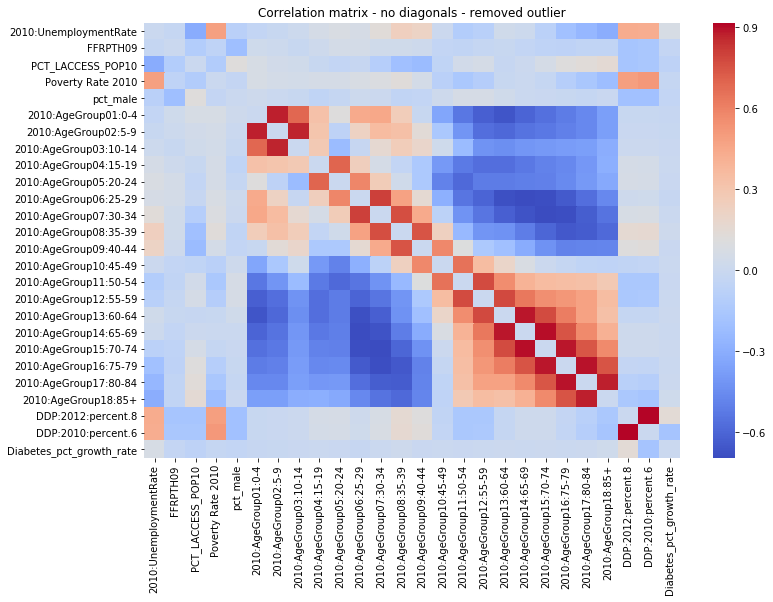

In [38]:
corr_removed_outliers.values[[np.arange(corr_removed_outliers.shape[0])]*2] = 0
plt.figure(figsize = (12, 8))
sns.heatmap(corr_removed_outliers, cmap='coolwarm')
plt.title("Correlation matrix - no diagonals - removed outlier")

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/LB/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


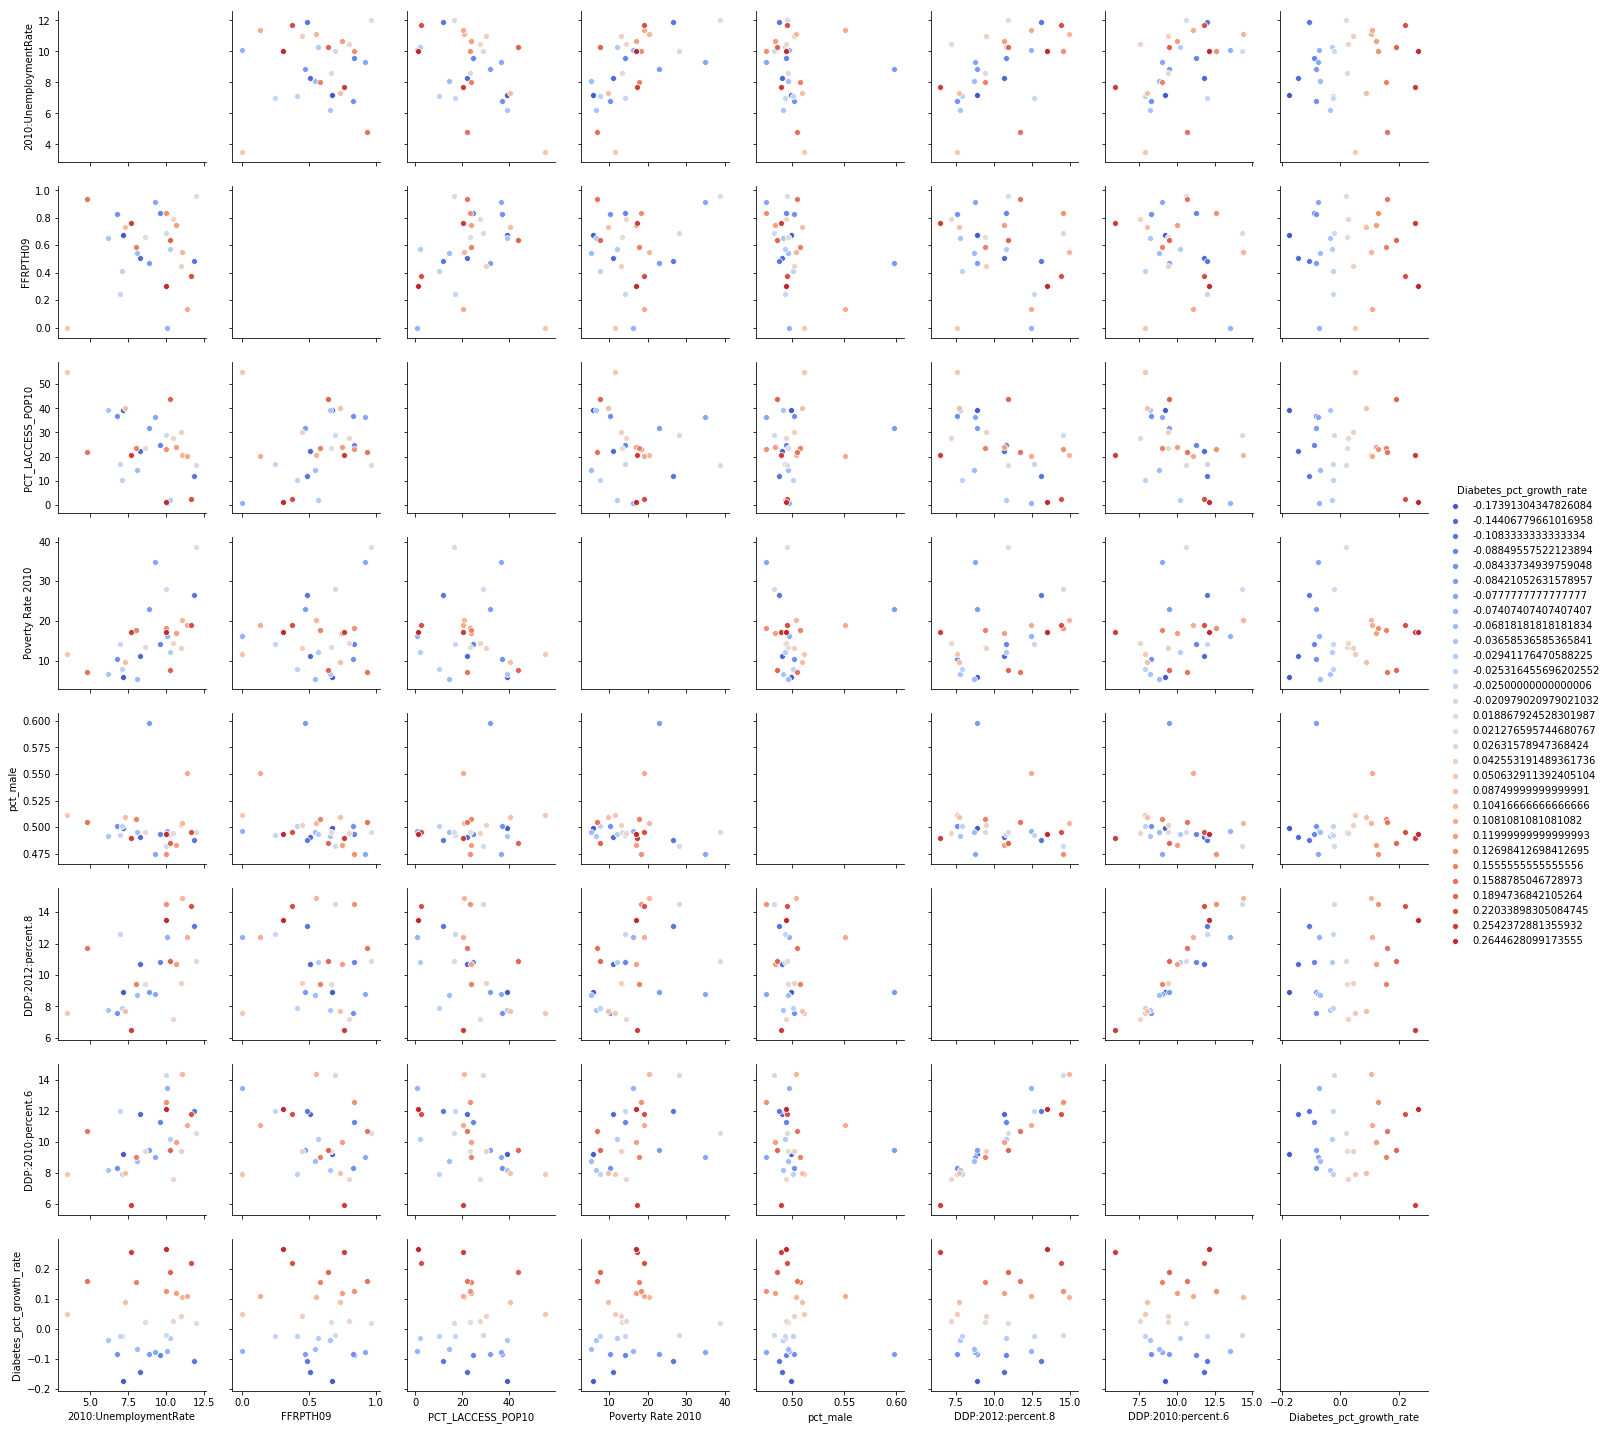

In [41]:
#should be with df df_removed_outliers
sns.pairplot(s[feats_and_target_numeric_no_ages], hue='Diabetes_pct_growth_rate', palette='coolwarm')

# NEXT STEP = Split Training/Test Data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop(['DDP:2012:percent.8', 'Diabetes_pct_growth_rate' ], axis = 1)
y = df['Diabetes_pct_growth_rate']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [48]:
X_train.tail(10)


,State,County,FIPS,2010:UnemploymentRate,DDP:2010:percent.6,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,...,2010:AgeGroup09:40-44,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+
1169,Louisiana,West Feliciana Parish,22125.0,6.7,13.0,0.255771,42.283082,15.280395,0.656064,0.063345,...,0.068896,0.075230,0.074642,0.070267,0.060929,0.048456,0.034089,0.026579,0.016848,0.017763
763,Indiana,Shelby,18145.0,11.0,11.4,0.404031,10.161947,11.909613,0.495544,0.058658,...,0.065149,0.083572,0.083190,0.074790,0.066247,0.047871,0.036894,0.027444,0.020857,0.017039
1845,New York,Kings,36047.0,9.9,10.2,0.651593,0.015700,22.697172,0.471664,0.065567,...,0.062724,0.081367,0.082106,0.072027,0.054676,0.043342,0.034038,0.030790,0.022225,0.020083
898,Kansas,Comanche,20033.0,4.5,11.0,0.000000,17.820662,6.219313,0.481756,0.067721,...,0.059872,0.070998,0.069814,0.065820,0.057613,0.045220,0.035471,0.028036,0.023629,0.025337
919,Kansas,Hamilton,20075.0,3.1,8.6,0.000000,100.000000,9.695817,0.507063,0.067285,...,0.055519,0.059496,0.073749,0.077063,0.064634,0.053861,0.052370,0.043752,0.028505,0.038117
1164,Louisiana,Vernon Parish,22115.0,8.6,11.3,0.471485,39.142169,12.648970,0.511790,0.067758,...,0.060592,0.071956,0.075963,0.069623,0.062352,0.047638,0.035448,0.027264,0.018699,0.015879
500,Georgia,Rabun,13241.0,11.8,13.6,0.920528,0.711715,23.582626,0.493057,0.064646,...,0.054541,0.068921,0.083171,0.072807,0.070735,0.051950,0.040938,0.033813,0.024744,0.026817
2989,West Virginia,Cabell,54011.0,7.2,13.2,1.041233,13.049014,21.281519,0.487671,0.054150,...,0.064508,0.078930,0.078537,0.080372,0.082470,0.055985,0.044841,0.032909,0.025567,0.022289
421,Georgia,Crisp,13081.0,14.2,14.2,0.598854,28.241409,31.235728,0.478732,0.054831,...,0.063669,0.072086,0.078038,0.069681,0.061985,0.048458,0.036253,0.027115,0.018638,0.013648
1829,New York,Chemung,36015.0,8.4,11.4,0.630283,23.672775,16.022985,0.497253,0.054183,...,0.066961,0.080116,0.085286,0.072667,0.067239,0.052777,0.039067,0.027716,0.024090,0.022822


In [ ]:
#X_train_try_1_first_10 indices:
#array([1211, 1514, 2503, 2818, 1167, 2986, 2751, 1434, 1729,  897])

#last 10 indices:
#array([1169,  763, 1845,  898,  919, 1164,  500, 2989,  421, 1829])

In [ ]:
#WOOO!!! THEY ARE THE SAME!!

In [49]:
X_train.shape, y_train.shape

((2193, 27), (2193,))

In [50]:
#check to see if that one outlier is in this group
X_train[X_train['FFRPTH09'] > 6]

,State,County,FIPS,2010:UnemploymentRate,DDP:2010:percent.6,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,...,2010:AgeGroup09:40-44,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+
296,Colorado,San Juan,8111.0,12.5,5.9,6.08828,99.24281,19.544846,0.560801,0.062101,...,0.08955,0.085474,0.08955,0.083571,0.066042,0.040495,0.013725,0.008697,0.00462,0.002718


In [51]:
X_train[X_train['FFRPTH09'] > 6].index.values[0]

296

In [52]:
X_train.iloc[296]

State                    North Dakota
County                      Williams 
FIPS                            38105
2010:UnemploymentRate             2.2
DDP:2010:percent.6                7.9
FFRPTH09                     0.870761
PCT_LACCESS_POP10             21.3547
Poverty Rate 2010              8.1298
pct_male                     0.515582
2010:AgeGroup01:0-4         0.0673905
2010:AgeGroup02:5-9         0.0700525
2010:AgeGroup03:10-14        0.069352
2010:AgeGroup04:15-19       0.0687916
2010:AgeGroup05:20-24       0.0534851
2010:AgeGroup06:25-29       0.0526445
2010:AgeGroup07:30-34       0.0577583
2010:AgeGroup08:35-39       0.0654291
2010:AgeGroup09:40-44       0.0686515
2010:AgeGroup10:45-49        0.073345
2010:AgeGroup11:50-54        0.076007
2010:AgeGroup12:55-59       0.0692469
2010:AgeGroup13:60-64       0.0596848
2010:AgeGroup14:65-69        0.049317
2010:AgeGroup15:70-74       0.0365324
2010:AgeGroup16:75-79       0.0274256
2010:AgeGroup17:80-84       0.0191944
2010:AgeGrou

In [53]:
y_train[296]

0.13559322033898302

In [54]:
X_train = X_train.drop(296)
y_train = y_train.drop(296)

In [55]:
X_train.shape

(2192, 27)

In [56]:
y_train.shape

(2192,)

# Model 0: Assume Average for al Counties: MSE

In [57]:
X_train.shape

(2192, 27)

In [58]:
avg = y_train.mean()
avg

0.054594032048708635

In [59]:
y_pred_avg = np.array([avg] * X_train.shape[0])
y_pred_avg

array([0.05459403, 0.05459403, 0.05459403, ..., 0.05459403, 0.05459403,
       0.05459403])

In [60]:
avg_model_mse = mean_squared_error(y_train, y_pred_avg)
avg_model_mse

0.013974801717106095

### MSE of "guess average diabetes rate" model (i.e. no model) = 0.01397 
(ideal = 0)

# Model Group A: Linear Regression

## (A) Linear Model 1: Making a simple linear regression model with just uneployment and poverty rate (the two most-relationship seeming)

In [61]:
def r2_to_adjusted_r2(r2, n, p):
    return r2 - ((1-r2) * (p / (n - p - 1)))

### #1 - using top 2 from coefficient matrix (unemployment & poverty)

In [64]:
model1 = LinearRegression()

In [66]:
cross_val_mse_1 = cross_val_score(model1, X_train[[unemp2019, pov2010]], y_train, cv=5,scoring='neg_mean_squared_error')
#'negative' MSE because Sklean follows convention that higher scores are always better than lower scores. (and ideal MSE = 0)
cross_val_mse_1

array([-0.01184126, -0.01351165, -0.01348511, -0.01598672, -0.01443017])

In [67]:
cross_val_mse_1.mean()

-0.013850981501941867

In [70]:
((-cross_val_mse_1.mean()) - avg_model_mse) / avg_model_mse

-0.00886024844364442

### MSE of linear model with 2 = 0.013 --> .89% better (..bleh)

In [71]:
# Hashing out adjsuted R2! not using that metric anymore

# cross_val_R2_1 = cross_val_score(model1, X_train[[unemp2019, pov2010]], y_train, cv=5)
# cross_val_adjusted_R2_1 = r2_to_adjusted_r2(cross_val_R2_1, X_train[[unemp2019, pov2010]].shape[0], X_train[[unemp2019, pov2010]].shape[1])
# cross_val_adjusted_R2_1

In [72]:
model1.fit(X_train[[unemp2019, pov2010]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
model1.score(X_train[[unemp2019, pov2010]], y_train)   #this is r2 --> not using

0.01166083340201507

In [74]:
model1.coef_

array([ 0.00456805, -0.00138707])

In [75]:
#also using statsmodels, wihch has a nice way at looking at pvalues
import statsmodels.api as sm
X_train_1_sm = sm.add_constant(X_train[[unemp2019, pov2010]], prepend=False)
model_sm = sm.OLS(np.array(y_train), np.array(X_train_1_sm))
results = model_sm.fit()
results.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.91
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           2.66e-06
Time:                        16:34:25   Log-Likelihood:                 1583.0
No. Observations:                2192   AIC:                            -3160.
Df Residuals:                    2189   BIC:                            -3143.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0046      0.001      5.017      0.000       0.003       0.006
x2            -0.0014      0.000     -3.144      0.002      -0.002      -0.001
const          0.0345      0.008      4.083      0.000       0.018       0.051
==============================================================================
Omnibus:                      125.738   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.331
Skew:                           0.533   Prob(JB):                     1.26e-36
Kurtosis:                       3.821   Cond. No.                         67.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#Residual plots --> not even useful now because linear is so bad

# fig, axs = plt.subplots(3,1, figsize=(8,20))

# axs[0].scatter(X_train[unemp2019], results.resid, alpha = .25)
# axs[0].hlines(0,
#               X_train[unemp2019].min(), 
#               X_train[unemp2019].max(), 
#               'k', linestyle='dashed')
# axs[0].set_xlabel('unemployment rates')
# axs[0].set_ylabel('residuals');

# axs[1].scatter(X_train[pov2010], results.resid, alpha = .25)
# axs[1].hlines(0,
#               X_train[pov2010].min(), 
#               X_train[pov2010].max(), 
#               'k', linestyle='dashed')
# axs[1].set_xlabel('poverty rates')
# axs[1].set_ylabel('residuals');

# axs[2].scatter(results.fittedvalues, results.resid, alpha = .25)
# axs[2].hlines(0,
#               results.fittedvalues.min(), 
#               results.fittedvalues.max(),
#               'k', linestyle='dashed')
# axs[2].set_xlabel('predicted diabetes rate')
# axs[2].set_ylabel('residuals');

In [77]:
#What do I take from this? these values are more blobby...not really linear. There are a LOT of values that cluster around specific areas.

#homeo-skadic-ish... (not widely in any other pattern (?))

### #2/3 - using *just* unemployment and poverty, as those two correlate more than others - does one do better on their own? 

In [227]:
# cols = [unemp2019]

# model2 = LinearRegression()
# cross_val_R2_2 = cross_val_score(model2, X_train[cols], y_train, cv=5)
# cross_val_adjusted_R2_2 = r2_to_adjusted_r2(cross_val_R2_2, X_train[cols].shape[0], X_train[cols].shape[1])
# cross_val_adjusted_R2_2   #WORSE!!

array([0.1783774 , 0.11382297, 0.16114863, 0.1927365 , 0.19690713])

In [337]:
# cross_val_adjusted_mse_2 = cross_val_score(model2, X_train[cols], y_train, cv=5, scoring='neg_mean_squared_error')
# cross_val_adjusted_mse_2

array([-4.57881247, -3.97372501, -4.41314319, -4.42990524, -4.15685127])

In [338]:
# cross_val_adjusted_mse_2.mean()

-4.310487436743371

In [228]:
# cols = [pov2010]  

# model3 = LinearRegression()
# cross_val_R2_3 = cross_val_score(model3, X_train[cols], y_train, cv=5)
# cross_val_adjusted_R2_3 = r2_to_adjusted_r2(cross_val_R2_3, X_train[cols].shape[0], X_train[cols].shape[1])
# cross_val_adjusted_R2_3  #Worse than both, but better the other! (..which is expected based on )

array([0.20362668, 0.24868906, 0.2667977 , 0.26202656, 0.24141452])

###   #4 Using all avaialable rows (good measure, although I dont think this is a linear regression problem)

In [87]:
model4 = LinearRegression()

In [89]:
feats_numeric

['2010:UnemploymentRate',
 'FFRPTH09',
 'PCT_LACCESS_POP10',
 'Poverty Rate 2010',
 'pct_male',
 '2010:AgeGroup01:0-4',
 '2010:AgeGroup02:5-9',
 '2010:AgeGroup03:10-14',
 '2010:AgeGroup04:15-19',
 '2010:AgeGroup05:20-24',
 '2010:AgeGroup06:25-29',
 '2010:AgeGroup07:30-34',
 '2010:AgeGroup08:35-39',
 '2010:AgeGroup09:40-44',
 '2010:AgeGroup10:45-49',
 '2010:AgeGroup11:50-54',
 '2010:AgeGroup12:55-59',
 '2010:AgeGroup13:60-64',
 '2010:AgeGroup14:65-69',
 '2010:AgeGroup15:70-74',
 '2010:AgeGroup16:75-79',
 '2010:AgeGroup17:80-84',
 '2010:AgeGroup18:85+',
 'DDP:2010:percent.6']

In [90]:
cross_val_mse_4 = cross_val_score(model4, X_train[feats_numeric], y_train, cv=5, scoring = 'neg_mean_squared_error')
print('mean MSE',cross_val_mse_4.mean())
cross_val_mse_4


mean MSE -0.012892251559509668


array([-0.0113275 , -0.01263938, -0.01283351, -0.01468803, -0.01297284])

In [92]:
((-cross_val_mse_4.mean()) - avg_model_mse) / avg_model_mse

-0.07746443774377944

#### MSE of linear model when using all columns -> .0129 -->  7.75 % better than with avg (no) model.

In [93]:
model4.fit(X_train[feats_numeric], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
model4.coef_

array([ 6.08539769e-03, -4.03819223e-02, -2.80583095e-04,  1.11152849e-03,
       -5.64802156e-01, -3.62143944e-01,  3.54825040e-02, -5.61297317e-01,
        1.83721549e-01, -5.95626034e-02, -2.77755743e-01, -4.96919017e-01,
        2.84608886e+00, -1.47090968e+00,  3.30227472e-01, -4.11991878e-01,
       -4.91929360e-01, -9.04236838e-02, -1.06227153e+00,  1.81311643e+00,
        2.03532999e-01, -9.24879838e-01,  7.97914791e-01, -1.80631959e-02])

In [95]:
import statsmodels.api as sm
X_train_sm_4 = sm.add_constant(X_train[feats_numeric], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_4))
res = mod.fit()
res.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     10.10
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           2.00e-34
Time:                        16:41:48   Log-Likelihood:                 1681.7
No. Observations:                2192   AIC:                            -3315.
Df Residuals:                    2168   BIC:                            -3179.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0061      0.001      6.220      0.000       0.004       0.008
x2            -0.0404      0.009     -4.455      0.000      -0.058      -0.023
x3            -0.0003      0.000     -2.182      0.029      -0.001   -2.84e-05
x4             0.0011      0.000      2.347      0.019       0.000       0.002
x5            -0.5648      0.117     -4.819      0.000      -0.795      -0.335
x6            -0.3342      0.559     -0.598      0.550      -1.430       0.761
x7             0.0634      0.743      0.085      0.932      -1.394       1.521
x8            -0.5334      0.653     -0.817      0.414      -1.813       0.747
x9             0.2116      0.446      0.475      0.635      -0.662       1.086
x10           -0.0316      0.245     -0.129      0.897      -0.511       0.448
x11           -0.2498      0.496     -0.504      0.614      -1.222       0.722
x12           -0.4690      0.666     -0.704      0.481      -1.775       0.837
x13            2.8740      0.690      4.166      0.000       1.521       4.227
x14           -1.4430      0.622     -2.319      0.020      -2.663      -0.223
x15            0.3581      0.587      0.611      0.542      -0.792       1.509
x16           -0.3841      0.612     -0.627      0.530      -1.585       0.816
x17           -0.4640      0.592     -0.784      0.433      -1.624       0.696
x18           -0.0625      0.606     -0.103      0.918      -1.251       1.126
x19           -1.0344      0.664     -1.558      0.119      -2.336       0.267
x20            1.8410      0.872      2.111      0.035       0.131       3.552
x21            0.2314      0.976      0.237      0.812      -1.682       2.145
x22           -0.8970      1.070     -0.838      0.402      -2.995       1.201
x23            0.8258      0.678      1.218      0.223      -0.504       2.155
x24           -0.0181      0.001    -12.980      0.000      -0.021      -0.015
const          0.5025      0.062      8.102      0.000       0.381       0.624
==============================================================================
Omnibus:                      106.888   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.941
Skew:                           0.476   Prob(JB):                     4.09e-31
Kurtosis:                       3.792   Cond. No.                     1.78e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.92e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
col_indices_small_p = np.argwhere(abs(res.pvalues) < .01)
col_indices_small_p = col_indices_small_p[:-1]  #not counting constant
col_indices_small_p

array([[ 0],
       [ 1],
       [ 4],
       [12],
       [23]])

In [97]:
col_names_small_p = X_train[feats_numeric].columns[col_indices_small_p]
col_names_small_p = list(col_names_small_p)
col_names_small_p

['2010:UnemploymentRate',
 'FFRPTH09',
 'pct_male',
 '2010:AgeGroup08:35-39',
 'DDP:2010:percent.6']

###   #5 Using columns which had really low p-values


#### MSE was -3.54  --> i could essentially go without all the other columns and do the same

In [98]:
model5 = LinearRegression()

In [99]:
cross_val_mse_5 = cross_val_score(model5, X_train[col_names_small_p], y_train, cv=5, scoring='neg_mean_squared_error')
print ('mean MSE:', cross_val_mse_5.mean())
cross_val_mse_5

mean MSE: -0.012965376130836074


array([-0.01099795, -0.01271027, -0.01282789, -0.01493735, -0.01335342])

In [100]:
model5.fit(X_train[col_names_small_p], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
model5.coef_

array([ 0.00671112, -0.03781198, -0.59605812,  0.80626112, -0.01555486])

In [102]:
import statsmodels.api as sm
X_train_sm_5 = sm.add_constant(X_train[col_names_small_p], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_5))
res = mod.fit()
res.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     36.97
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.78e-36
Time:                        16:45:49   Log-Likelihood:                 1659.1
No. Observations:                2192   AIC:                            -3306.
Df Residuals:                    2186   BIC:                            -3272.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0067      0.001      7.781      0.000       0.005       0.008
x2            -0.0378      0.009     -4.216      0.000      -0.055      -0.020
x3            -0.5961      0.116     -5.141      0.000      -0.823      -0.369
x4             0.8063      0.287      2.806      0.005       0.243       1.370
x5            -0.0156      0.001    -12.603      0.000      -0.018      -0.013
const          0.4301      0.065      6.634      0.000       0.303       0.557
==============================================================================
Omnibus:                      113.555   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.000
Skew:                           0.496   Prob(JB):                     4.42e-33
Kurtosis:                       3.805   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#plot residuals for everything    ####TOMORROW: PLOT RESIDUALS OF THESE, THEN TOMORROW TRY RANDOM FOREST! FOREST!!!!
## DO REGULARIZATION! MAKE COEFFICENTS MUCH SMALLER!!!


# fig, axs = plt.subplots(3,1, figsize=(8,20))

# axs[0].scatter(X_train[unemp2019], results.resid, alpha = .25)
# axs[0].hlines(0,
#               X_train[unemp2019].min(), 
#               X_train[unemp2019].max(), 
#               'k', linestyle='dashed')
# axs[0].set_xlabel('unemployment rates')
# axs[0].set_ylabel('residuals');

# Model #2 -> Random forest(s)

### Plan:
 - Do one with just numbers  (evaluate with MSE)
 - Do one with *state* also (dummy) 
 - Plot partial dependence plots
 - 

In [136]:
model_r1 = RandomForestRegressor(n_estimators = 500, oob_score=True)

In [137]:
model_r1.fit(X_train[feats_numeric], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [138]:
#cross_val_score(model_r1, X_train[feats_all_numeric_no_target], y_train, cv = 5)   #default score is R2

In [139]:
model_r1.oob_score_   #R2

0.07968662028441764

In [140]:
y_pred_rf1 = model_r1.oob_prediction_

In [141]:
rf1_mse = mean_squared_error(y_train, y_pred_rf1)
rf1_mse

0.012861196999125035

In [142]:
( rf1_mse -  avg_model_mse ) /  avg_model_mse

-0.07968662028441761

#### MSE of Random Forest model with all columns  = 3.09 --> 46% decrease in MSE (=46% improvement!)

In [118]:
model_r2 = RandomForestRegressor(n_estimators=20)

In [115]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 200, 500]
max_features = ['auto', 'sqrt']
max_depth = [15, 30, None]
# Maximum number of levels in tree
random_grid2 = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth
               }

print(random_grid2)

{'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 30, None]}


In [131]:
n_iter_search = 10
random_search = RandomizedSearchCV(model_r2, param_distributions=random_grid2,
                                   n_iter=n_iter_search, cv=5)

In [132]:
random_search.fit(X_train[feats_numeric], y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 30, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [133]:
random_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}

In [135]:
random_search.refit

True

# Model 4: Random Forest with State Dummies

In [144]:
states = pd.get_dummies(X_train['State'], prefix='S:')

In [145]:
X_train.head()

,State,County,FIPS,2010:UnemploymentRate,DDP:2010:percent.6,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,...,2010:AgeGroup09:40-44,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+
1211,Massachusetts,Barnstable,25001.0,9.9,8.6,0.990768,50.352994,9.034328,0.476423,0.046640,...,0.063969,0.079242,0.082016,0.077253,0.071285,0.051921,0.038508,0.033341,0.029759,0.032312
1514,Missouri,Gentry,29075.0,7.9,11.3,0.890208,3.307962,17.678462,0.483526,0.062121,...,0.059762,0.066950,0.067187,0.062088,0.053653,0.040920,0.031278,0.026125,0.020769,0.021158
2503,Tennessee,Sumner,47165.0,8.9,10.0,0.566683,28.204244,9.771492,0.487964,0.066993,...,0.073984,0.080778,0.073263,0.062114,0.052275,0.039177,0.028143,0.020416,0.012803,0.010134
2818,Virginia,Appomattox,51011.0,8.6,12.4,0.270051,2.969736,16.420639,0.486876,0.056746,...,0.072341,0.065541,0.058321,0.054078,0.045355,0.029832,0.018745,0.013996,0.010822,0.013558
1167,Louisiana,West Baton Rouge Parish,22121.0,7.9,13.0,0.685166,16.493161,14.927769,0.491761,0.066098,...,0.057653,0.071958,0.070234,0.064202,0.060065,0.050586,0.044381,0.034385,0.021113,0.017925


In [146]:
states.head()

,S:_Alabama,S:_Alaska,S:_Arizona,S:_Arkansas,S:_California,S:_Colorado,S:_Connecticut,S:_Delaware,S:_Florida,S:_Georgia,...,S:_South Dakota,S:_Tennessee,S:_Texas,S:_Utah,S:_Vermont,S:_Virginia,S:_Washington,S:_West Virginia,S:_Wisconsin,S:_Wyoming
1211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2503,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
X_train_states = X_train.drop(['State', "County", 'FIPS'], axis=1).join(states)

X_train_states.columns

Index(['2010:UnemploymentRate', 'DDP:2010:percent.6', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'pct_male',
       '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14',
       '2010:AgeGroup04:15-19', '2010:AgeGroup05:20-24',
       '2010:AgeGroup06:25-29', '2010:AgeGroup07:30-34',
       '2010:AgeGroup08:35-39', '2010:AgeGroup09:40-44',
       '2010:AgeGroup10:45-49', '2010:AgeGroup11:50-54',
       '2010:AgeGroup12:55-59', '2010:AgeGroup13:60-64',
       '2010:AgeGroup14:65-69', '2010:AgeGroup15:70-74',
       '2010:AgeGroup16:75-79', '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+',
       'S:_Alabama', 'S:_Alaska', 'S:_Arizona', 'S:_Arkansas', 'S:_California',
       'S:_Colorado', 'S:_Connecticut', 'S:_Delaware', 'S:_Florida',
       'S:_Georgia', 'S:_Hawaii', 'S:_Idaho', 'S:_Illinois', 'S:_Indiana',
       'S:_Iowa', 'S:_Kansas', 'S:_Kentucky', 'S:_Louisiana', 'S:_Maine',
       'S:_Maryland', 'S:_Massachusetts', 'S:_Michigan', 'S:_Minnesota',
  

In [150]:
model_r4 = RandomForestRegressor(n_estimators = 500, oob_score=True)

model_r4.fit(X_train_states, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [151]:
y_pred_rf4 = model_r4.oob_prediction_

rf4_mse = mean_squared_error(y_train, y_pred_rf4)
rf4_mse

0.011992857214504276